# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset (airbnb dataset). We will predict airbnb price based on other features.

# [25 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first few rows of the data
- drop the following columns: name, host_id, host_name, last_review
- display a summary of the statistics of the loaded data
- plot histograms for 3 features of your choice

In [84]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5

import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

import os
import tarfile
import urllib

import pandas as pd

import matplotlib.image as mpimg

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [85]:
DATASET_PATH = os.path.join("datasets", "airbnb")

def load_airbnb_data(airbnb_path):
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)
airbnb = load_airbnb_data(DATASET_PATH)
airbnb = airbnb.drop(columns=['name','host_id','host_name','last_review'])
airbnb.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [86]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


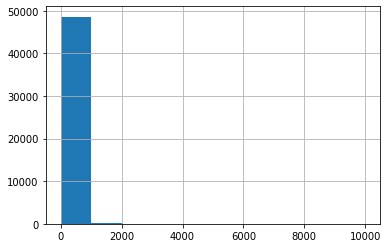

In [87]:
airbnb["price"].hist()
plt.show()

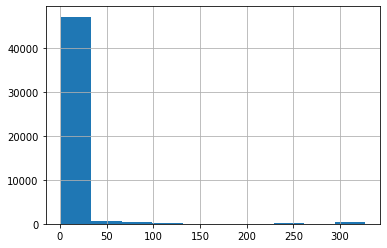

In [88]:
airbnb["calculated_host_listings_count"].hist()
plt.show()

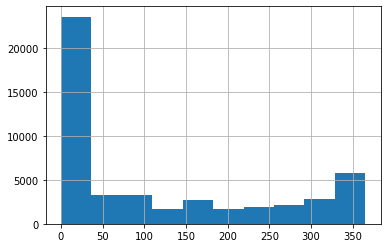

In [89]:
airbnb["availability_365"].hist()
plt.show()

### [5 pts] Plot total number_of_reviews per neighbourhood_group

In [90]:
answer = airbnb.groupby("neighbourhood_group", as_index=False)["number_of_reviews"].sum()
answer

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


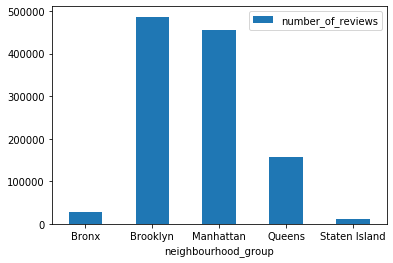

In [91]:
answer_graph = answer.plot.bar(x='neighbourhood_group', y='number_of_reviews', rot=0)

### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

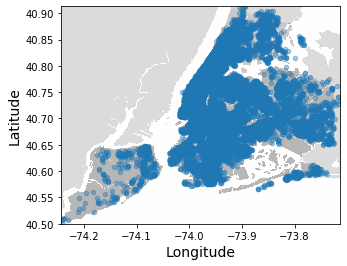

In [92]:
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename="newyorkcity.jpeg"
#import matplotlib.image as mpimg
newyork_img = mpimg.imread(os.path.join(images_path, filename))
ax = airbnb.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4)
plt.imshow(newyork_img, extent=[-74.244420,-73.712990,40.499790,40.913060],alpha=0.5)
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("Longitude",fontsize=14)
plt.show()

### [5 pts] Plot average price of room types who have availability greater than 180 days. 

In [93]:
is_avail = airbnb["availability_365"] > 180
airbnb_avail = airbnb[is_avail]
airbnb_avail.head()
result = airbnb_avail.groupby("room_type", as_index=False)["price"].mean()
result

,room_type,price
0,Entire home/apt,248.870817
1,Private room,100.028192
2,Shared room,56.941909


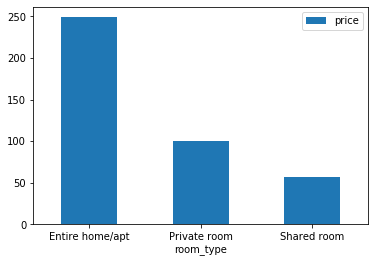

In [94]:
result_graph = result.plot.bar(x='room_type', y='price', rot=0)

### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28bed0b8>,
      dtype=object)

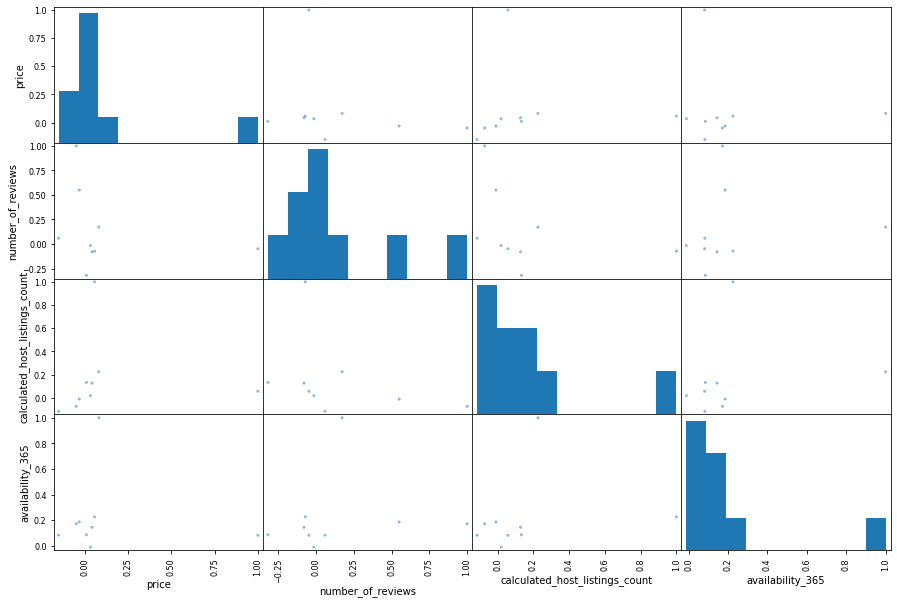

In [95]:
airbnb_corr_matrix = airbnb.corr()
#from pandas.plotting import scatter_matrix
attributes=["price","number_of_reviews","calculated_host_listings_count","availability_365"]
scatter_matrix(airbnb_corr_matrix[attributes], figsize=(15,10))

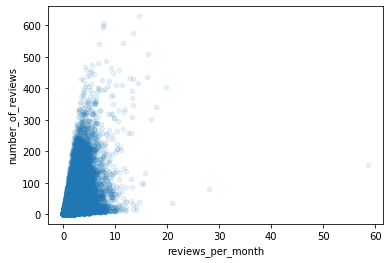

In [96]:
airbnb.plot(kind="scatter", x="reviews_per_month", y="number_of_reviews",
             alpha=0.1)

reviews_per_month and number_of_reviews: positive correlation

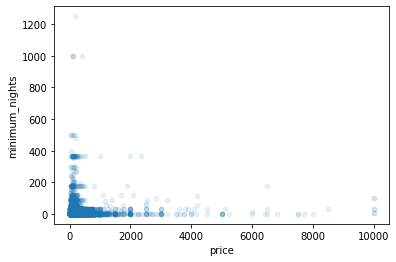

In [97]:
airbnb.plot(kind="scatter", x="price", y="minimum_nights",
             alpha=0.1)

price and minimum_nights: positive correlation

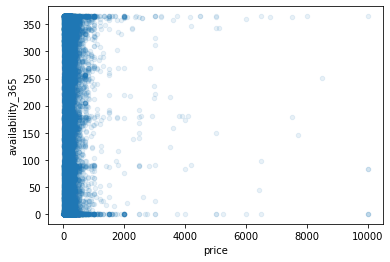

In [98]:
airbnb.plot(kind="scatter", x="price", y="availability_365",
             alpha=0.1)

price and availability_365: no correlation

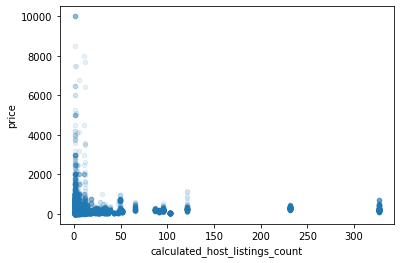

In [99]:
airbnb.plot(kind="scatter", x="calculated_host_listings_count", y="price",
             alpha=0.1)

calculated_host_listings_count and price: positive correlation

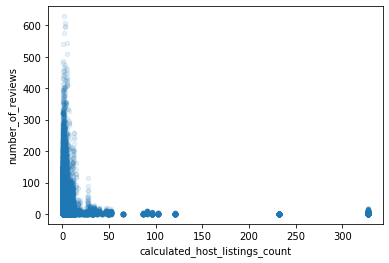

In [100]:
airbnb.plot(kind="scatter", x="calculated_host_listings_count", y="number_of_reviews",
             alpha=0.1)

calculated_host_listings_count and number_of_reviews: positive correlation

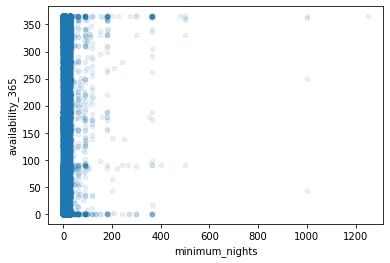

In [101]:
airbnb.plot(kind="scatter", x="minimum_nights", y="availability_365",
             alpha=0.1)

minimum_nights and availability_365: unclear correlation

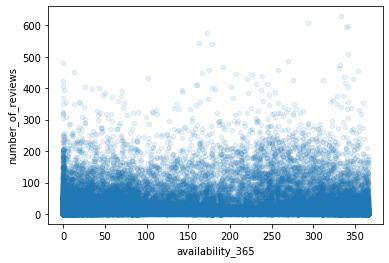

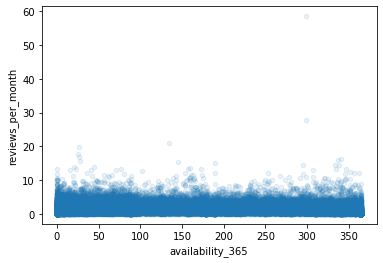

In [102]:
airbnb.plot(kind="scatter", x="availability_365", y="number_of_reviews",
             alpha=0.1)
airbnb.plot(kind="scatter", x="availability_365", y="reviews_per_month",
             alpha=0.1)

availability_365 and number_of_reviews: unclear correlation

availability_365 and reviews_per_month: possibly negative correlation

Reviews per month and the number of reviews appears to have a positive correlation, which makes sense given that a higher number of reviews per month would end up increasing the total number of reviews. Other pairs of features such as minimum nights and price, host listings count and price, and host listings count and number of reviews look to only have slight positive correlation. It can be hard to tell because oftentimes the data will include a density of points that look like a straight line. 

There don't appear to be any features that have an overt negative correlation. A case could be made for availability and the number of reviews per month, where a higher number of available days theoretically should correlate to a low number of reviews per month. After all, a higher number of available days means people aren't reserving the listing as much, so a lower number of guests should result in a low number of reviews per month. Given there are other factors that impact the number of reviews per month, like customer dissatisfaction or laziness, the correlation between availability and number of reviews per month is very hard to see on the graph.

# [25 pts] Prepare the Data

### [5 pts] Augment the dataframe with two other features which you think would be useful

In [103]:
airbnb["reviews_squared_per_month"] = airbnb["number_of_reviews"] * airbnb["reviews_per_month"]
airbnb["nights_available_one_stay"] = airbnb["availability_365"] - airbnb["minimum_nights"]

### [5 pts] Set aside 20% of the data as test test (80% train, 20% test).

In [104]:
airbnb = airbnb.drop(columns=['id','neighbourhood','latitude','longitude'])
airbnb_x = airbnb.drop(columns=["price"])
airbnb_y = airbnb["price"]
x_train, x_test, y_train, y_test = train_test_split(airbnb_x, airbnb_y, test_size=0.2, random_state=42)


### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [105]:
incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
incomplete_rows

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_squared_per_month,nights_available_one_stay
2,Manhattan,Private room,150,3,0,NaN,1,365,NaN,362
19,Manhattan,Entire home/apt,190,7,0,NaN,2,249,NaN,242
26,Manhattan,Private room,80,4,0,NaN,1,0,NaN,-4
36,Brooklyn,Private room,35,60,0,NaN,1,365,NaN,305
38,Brooklyn,Private room,150,1,0,NaN,1,365,NaN,364


In [106]:
incomplete_rows["reviews_per_month"].fillna(0, inplace=True)
incomplete_rows.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_squared_per_month,nights_available_one_stay
2,Manhattan,Private room,150,3,0,0.0,1,365,NaN,362
19,Manhattan,Entire home/apt,190,7,0,0.0,2,249,NaN,242
26,Manhattan,Private room,80,4,0,0.0,1,0,NaN,-4
36,Brooklyn,Private room,35,60,0,0.0,1,365,NaN,305
38,Brooklyn,Private room,150,1,0,0.0,1,365,NaN,364


I chose to replace the null values with 0. I noticed that the null values occured in the 'reviews_per_month' column and inferred that it was because the value in the 'number_of_reviews' column was 0 and whatever calculation outputted the number of reviews per month would output a null value. When the number of reviews was 0, I thought it was reasonable to set the number of reviews per month to 0 as well instead of a null value.

### [10 pts] Code complete data pipeline using sklearn mixins

In [107]:
airbnb_num = x_train.drop(["neighbourhood_group", "room_type"], axis=1)
airbnb_num.head()
nights_ix, num_reviews_ix, reviewspm_ix, avail_ix = 1, 2, 3, 5

In [108]:
airbnb_imputer = SimpleImputer(strategy="constant", fill_value=0)

class Augment_Features1(BaseEstimator, TransformerMixin):
    def __init__(self, add_reviews_squared_per_month = True):
        self.add_reviews_squared_per_month = add_reviews_squared_per_month
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        nights_available_one_stay = X[:, avail_ix] - X[:, nights_ix]
        if self.add_reviews_squared_per_month:
            reviews_squared_per_month = X[:, num_reviews_ix] * X[:, reviewspm_ix]
            return np.c_[X, nights_available_one_stay, reviews_squared_per_month]
        else:
            return np.c_[X, nights_available_one_stay]
#airbnb_attr_adder = Augment_Features1()
#airbnb_extra_attribs = airbnb_attr_adder.transform(x_train.values)

airbnb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=1)),
    ('attribs_adder', Augment_Features1()),
    ('std_scaler', StandardScaler()),
])
airbnb_num_tr = airbnb_pipeline.fit_transform(airbnb_num)
num_features = list(airbnb_num)
cat_features = ["neighbourhood_group", "room_type"]

a_full_pipeline = ColumnTransformer([
    ("num", airbnb_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])
airbnb_prepared = a_full_pipeline.fit_transform(x_train)

# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using MSE.
Provide both test and train set MSE values.

In [109]:
a_lin_reg = LinearRegression()
a_lin_reg.fit(airbnb_prepared, y_train)

a_data = x_test.iloc[:5]
a_labels = y_train.iloc[:5]
a_data_prepared = a_full_pipeline.transform(a_data)

print("Predictions:", a_lin_reg.predict(a_data_prepared))
print("Actual labels:", list(a_labels))

Predictions: [182.95703125  56.34765625 112.37890625 266.76953125 223.06640625]
Actual labels: [295, 70, 58, 75, 38]


In [111]:
a_preds = a_lin_reg.predict(airbnb_prepared)
a_mse = mean_squared_error(y_train, a_preds)
a_rmse = np.sqrt(a_mse)
print("Mean squared loss:", a_rmse)

Mean squared loss: 235.7809852797133
